## Probeweise Durchführung einer Teststatistik für Tokenfrequency pro Vers

- **Nullhypothese (H0)**: Es gibt **keinen signifikanten Unterschied** in der Tokenanzahl/Vers zwischen den beiden Subsamples (m-w).
- **Alternativhypothese (H1)**: Es gibt **einen signifikanten Unterschied** in der Tokenanzahl/Vers zwischen den beiden Subsamples (m-w).

In [31]:
import os
import json
import nltk
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

Für jedes Teilkorpus: Liste mit Tokenanzahl für jede Line
len(tokens_per_line_list_m/w) = Gesamtzahl der Verse pro Subsample

In [22]:
# Install nltk data if not already installed
nltk.download('punkt')

def count_tokens_per_line(poem):
    tokens_per_line = []
    for line in poem.values():
        text = line['text']
        tokens = word_tokenize(text)
        tokens_per_line.append(len(tokens))
    return tokens_per_line

# Iterate through all JSON files in the corpus folder
def list_tokens_per_line(corpus_folder):
    tokens_per_line_list = []
    for filename in os.listdir(corpus_folder):
        if filename.endswith('.json'):
            with open(os.path.join(corpus_folder, filename), 'r') as file:
                data = json.load(file)
                poem = data['poem']
                tokens_per_line_list.extend(count_tokens_per_line(poem))
    return tokens_per_line_list

tokens_per_line_list_m = list_tokens_per_line('corpus_selenium_m')
tokens_per_line_list_w = list_tokens_per_line('corpus_selenium_w')
print(tokens_per_line_list_m[:100])
print(tokens_per_line_list_w[:100])

[nltk_data] Downloading package punkt to /Users/jule/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[5, 5, 6, 3, 6, 6, 5, 6, 7, 6, 6, 5, 8, 4, 8, 9, 7, 5, 6, 8, 8, 6, 4, 11, 9, 7, 5, 12, 9, 10, 9, 11, 5, 15, 7, 11, 12, 11, 12, 14, 14, 13, 8, 11, 10, 9, 10, 11, 10, 14, 12, 8, 7, 13, 12, 12, 10, 14, 9, 14, 13, 18, 9, 13, 14, 14, 3, 4, 11, 13, 10, 14, 12, 10, 10, 13, 11, 8, 8, 10, 10, 10, 1, 1, 1, 1, 3, 3, 9, 10, 2, 1, 2, 2, 3, 3, 11, 13, 18, 2]
[8, 3, 9, 9, 14, 13, 8, 10, 10, 12, 9, 1, 1, 1, 1, 3, 6, 7, 6, 4, 2, 1, 1, 1, 1, 1, 4, 7, 8, 7, 8, 8, 11, 8, 7, 6, 7, 7, 7, 7, 9, 7, 6, 7, 7, 7, 7, 6, 7, 7, 9, 8, 5, 8, 8, 5, 8, 8, 7, 9, 7, 8, 7, 5, 7, 6, 10, 8, 7, 7, 9, 8, 7, 10, 11, 6, 9, 10, 7, 9, 8, 6, 8, 8, 7, 6, 8, 7, 10, 9, 7, 9, 9, 9, 3, 7, 6, 6, 5, 7]


## Teststatistik: t-Test?
Vorausssetzung ist Normalverteilung, also Normalverteilung testen:

In [18]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    if p_value > alpha:
        print(f"Die Tokenfrequenzen für {sample_name} sind normalverteilt (p-value={p_value:.4f}).")
    else:
        print(f"Die Tokenfrequenzen für {sample_name} sind nicht normalverteilt (p-value={p_value:.4f}).")

# Durchführung des Tests für beide Subsamples
test_normality(tokens_per_line_list_m, "Sample M")
test_normality(tokens_per_line_list_w, "Sample W")


Die Tokenfrequenzen für Sample M sind nicht normalverteilt (p-value=0.0000).
Die Tokenfrequenzen für Sample W sind nicht normalverteilt (p-value=0.0000).


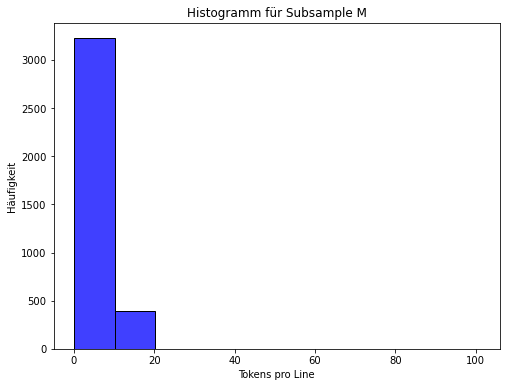

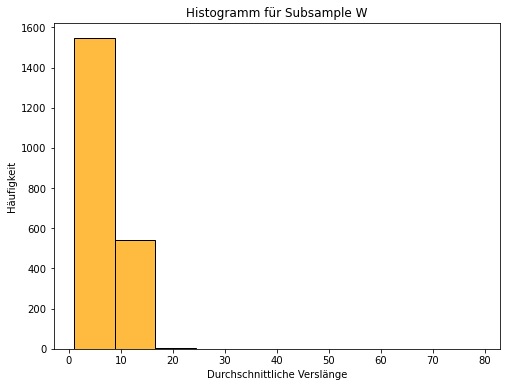

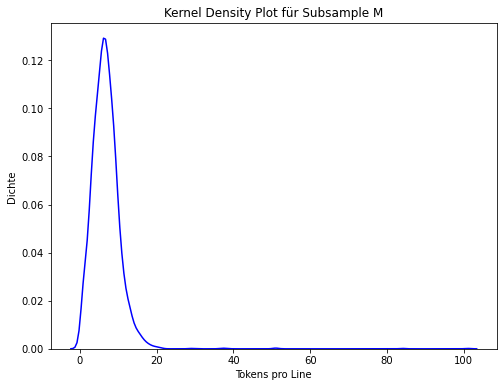

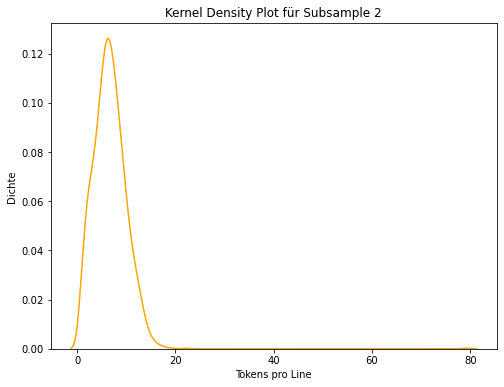

In [14]:
# Histogramm für Subsample M
plt.figure(figsize=(8, 6))
sns.histplot(tokens_per_line_list_m, kde=False, color='blue', bins=10)
plt.title('Histogramm für Subsample M')
plt.xlabel('Tokens pro Line')
plt.ylabel('Häufigkeit')
plt.show()

# Histogramm für Subsample W
plt.figure(figsize=(8, 6))
sns.histplot(tokens_per_line_list_w, kde=False, color='orange', bins=10)
plt.title('Histogramm für Subsample W')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Häufigkeit')
plt.show()

# Kernel Density Plot für Subsample M
plt.figure(figsize=(8, 6))
sns.kdeplot(tokens_per_line_list_m, color='blue')
plt.title('Kernel Density Plot für Subsample M')
plt.xlabel('Tokens pro Line')
plt.ylabel('Dichte')
plt.show()

# Kernel Density Plot für Subsample W
plt.figure(figsize=(8, 6))
sns.kdeplot(tokens_per_line_list_w, color='orange')
plt.title('Kernel Density Plot für Subsample 2')
plt.xlabel('Tokens pro Line')
plt.ylabel('Dichte')
plt.show()

&rarr; keine Normalverteilung, also anderer Test, nicht t-Test?

## Deskriptive Statistik

In [23]:
# Deskriptive Statistik für beide Subsamples
mean_m = np.mean(tokens_per_line_list_m)
mean_w = np.mean(tokens_per_line_list_w)

std_dev_m = statistics.stdev(tokens_per_line_list_m) # ddof=1 für die Berechnung der Stichprobenstandardabweichung
std_dev_w = statistics.stdev(tokens_per_line_list_w)

sample_size_m = len(tokens_per_line_list_m)
sample_size_w = len(tokens_per_line_list_w)

print("Mittlere Tokenfrequenz/Vers für männliche Autoren:", mean_m)
print("Mittlere Tokenfrequenz/Vers für weibliche Autoren:", mean_w)
print("Standardabweichung für männliche Autoren:", std_dev_m)
print("Standardabweichung für weibliche Autoren:", std_dev_w)
print("Stichprobengröße für männliche Autoren:", sample_size_m)
print("Stichprobengröße für weibliche Autoren:", sample_size_w)


Mittlere Tokenfrequenz für männliche Autoren: 6.793598233995585
Mittlere Tokenfrequenz für weibliche Autoren: 6.662052505966587
Standardabweichung für männliche Autoren: 4.004813949738498
Standardabweichung für weibliche Autoren: 3.5271313791954544
Stichprobengröße für männliche Autoren: 3624
Stichprobengröße für weibliche Autoren: 2095


## t-Test

In [28]:
# Signifikanztest (t-Test)
t_statistic, p_value = ttest_ind(tokens_per_line_list_m, tokens_per_line_list_w, equal_var=False)

# Berechne die Degrees of Freedom (Freiheitsgrade)
# Degrees of Freedom = (Anzahl der Beobachtungen in Sample 1) + (Anzahl der Beobachtungen in Sample 2) - 2
degree_of_freedom = sample_size_m + sample_size_w - 2

# Berechne die Effektstärke (Cohen's d)
pooled_std_dev = ((std_dev_m**2 * (sample_size_m - 1) + std_dev_w**2 * (sample_size_w - 1)) / degree_of_freedom)**0.5
effect_size = abs(mean_m - mean_w) / pooled_std_dev

print("Ergebnisse des t-Tests:")
print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)
print("Freiheitsgrad:", degree_of_freedom)
print("Effektstärke (Cohen's d):", effect_size)

Ergebnisse des t-Tests:
t-Statistik: 1.2921562785646339
p-Wert: 0.19636486969216801
Freiheitsgrad: 5717
Effektstärke (Cohen's d): 0.03428563936511152


**&rarr; Nullhypothese kann nicht abgelehnt werden.**

## Visualisierung

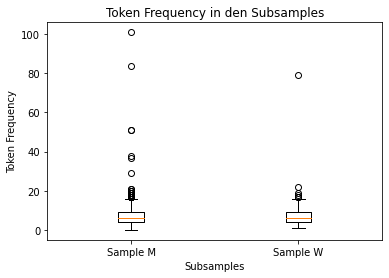

In [12]:
import matplotlib.pyplot as plt

# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots()

# Plotten der Daten als Boxplots
ax.boxplot([tokens_per_line_list_m, tokens_per_line_list_w], labels=['Sample M', 'Sample W'])

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Subsamples')
ax.set_ylabel('Token Frequency')
ax.set_title('Token Frequency in den Subsamples')

# Anzeigen der Grafik
plt.show()

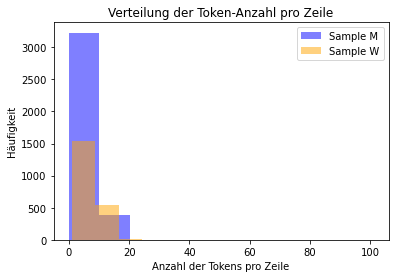

In [16]:
# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots()

# Plotten der Histogramme für beide Subsamples
ax.hist(tokens_per_line_list_m, bins=10, alpha=0.5, label='Sample M', color='blue')
ax.hist(tokens_per_line_list_w, bins=10, alpha=0.5, label='Sample W', color='orange')

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Anzahl der Tokens pro Zeile')
ax.set_ylabel('Häufigkeit')
ax.set_title('Verteilung der Token-Anzahl pro Zeile')

# Legende anzeigen
ax.legend()

# Anzeigen der Grafik
plt.show()